# Analysis of the Correctness

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 15})

df_to_create = pd.read_csv("../results/correctness.csv")
df_to_create.head()

ID              PART  P1T1  P1T2  P1T3  P1T4  P1T5  P2T1  P2T2  P2T3  P2T4  \
0   1     1st VR Chaoss   1.0   1.0  1.00   1.0   1.0   1.0   1.0  1.00   1.0   
1   2     1st SC Chaoss   1.0   1.0  1.00   1.0   1.0   1.0   1.0  0.67   1.0   
2   3  1st VR Openshift   1.0   1.0  1.00   1.0   1.0   1.0   1.0  1.00   1.0   
3   4  1st SC Openshift   1.0   1.0  0.83   0.5   1.0   1.0   1.0  1.00   1.0   
4   5  1st VR Openshift   1.0   0.5  1.00   1.0   1.0   1.0   1.0  1.00   1.0   

   P2T5  P1_AVG  P2_AVG  TOTAL_AVG  
0   1.0    1.00    1.00       1.00  
1   1.0    1.00    0.93       0.97  
2   1.0    1.00    1.00       1.00  
3   1.0    0.87    1.00       0.93  
4   1.0    0.90    1.00       0.95

In [3]:
# Get columns by groups
is_firstvrchaoss =  df_to_create['PART']=="1st VR Chaoss"
first_vr_chaoss = df_to_create[is_firstvrchaoss]

is_firstvrop =  df_to_create['PART']=="1st VR Openshift"
first_vr_openshift = df_to_create[is_firstvrop]

is_firstscchaoss =  df_to_create['PART']=="1st SC Chaoss"
first_sc_chaoss = df_to_create[is_firstscchaoss]

is_firstscopenshift =  df_to_create['PART']=="1st SC Openshift"
first_sc_openshift = df_to_create[is_firstscopenshift]


<ipython-input-4-89547be8bf99>:17: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([c1, c2, c3, c4],     # The line objects


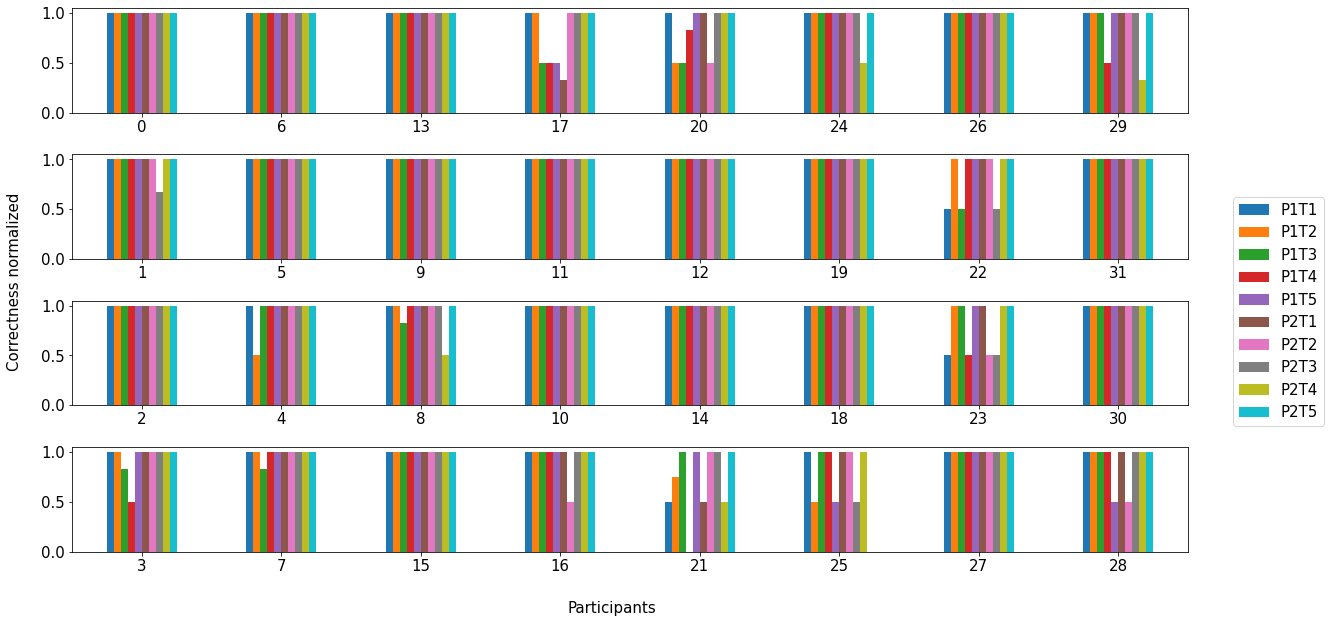

In [4]:
# Correctness by participant
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(20, 10))
plt.subplots_adjust(hspace=0.4)

c1 = first_vr_chaoss[['P1T1', 'P1T2', 'P1T3', 'P1T4', 'P1T5', 'P2T1', 'P2T2', 'P2T3', 'P2T4', 'P2T5']].plot(ax=axes[0], kind="bar", rot=0)
axes[0].get_legend().remove()

c2 = first_sc_chaoss[['P1T1', 'P1T2', 'P1T3', 'P1T4', 'P1T5', 'P2T1', 'P2T2', 'P2T3', 'P2T4', 'P2T5']].plot(ax=axes[1], kind="bar", rot=0)
axes[1].get_legend().remove()

c3 = first_vr_openshift[['P1T1', 'P1T2', 'P1T3', 'P1T4', 'P1T5', 'P2T1', 'P2T2', 'P2T3', 'P2T4', 'P2T5']].plot(ax=axes[2], kind="bar", rot=0)
axes[2].get_legend().remove()

c4 = first_sc_openshift[['P1T1', 'P1T2', 'P1T3', 'P1T4', 'P1T5', 'P2T1', 'P2T2', 'P2T3', 'P2T4', 'P2T5']].plot(ax=axes[3], kind="bar", rot=0)
axes[3].get_legend().remove()

fig.legend([c1, c2, c3, c4],     # The line objects
           labels=['P1T1', 'P1T2', 'P1T3', 'P1T4', 'P1T5', 'P2T1', 'P2T2', 'P2T3', 'P2T4', 'P2T5'],   # The labels for each line
           loc="right",   # Position of legend
           )

fig.text(0.5, 0.04, 'Participants', ha='center')
fig.text(0.08, 0.5, 'Correctness normalized', va='center', rotation='vertical')

plt.savefig('correctness_participants.png', bbox_inches='tight')

<ipython-input-5-f5041c2c7a9d>:15: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([c],     # The line objects


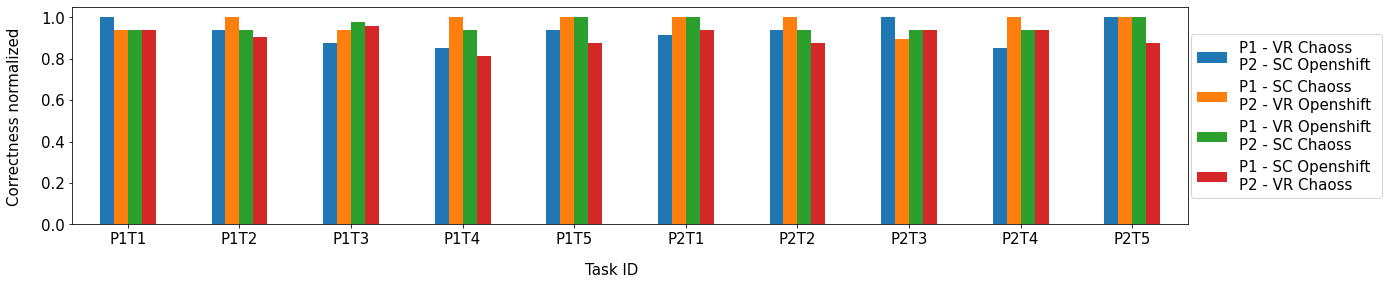

In [5]:
# Means by group

data = {'1st VR Chaoss': first_vr_chaoss[['P1T1', 'P1T2', 'P1T3', 'P1T4', 'P1T5', 'P2T1', 'P2T2', 'P2T3', 'P2T4', 'P2T5']].mean(),
        '1st SC Chaoss': first_sc_chaoss[['P1T1', 'P1T2', 'P1T3', 'P1T4', 'P1T5', 'P2T1', 'P2T2', 'P2T3', 'P2T4', 'P2T5']].mean(),
        '1st VR Openshift': first_vr_openshift[['P1T1', 'P1T2', 'P1T3', 'P1T4', 'P1T5', 'P2T1', 'P2T2', 'P2T3', 'P2T4', 'P2T5']].mean(),
        '1st SC Openshift': first_sc_openshift[['P1T1', 'P1T2', 'P1T3', 'P1T4', 'P1T5', 'P2T1', 'P2T2', 'P2T3', 'P2T4', 'P2T5']].mean()
       }

corr_means = pd.DataFrame(data)


fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 4))
c = corr_means.plot(ax=axes, kind="bar", rot=0)
axes.get_legend().remove()
fig.legend([c],     # The line objects
           labels=["P1 - VR Chaoss \nP2 - SC Openshift", "P1 - SC Chaoss \nP2 - VR Openshift", "P1 - VR Openshift \nP2 - SC Chaoss", "P1 - SC Openshift \nP2 - VR Chaoss"],   # The labels for each line
           loc="right",   # Position of legend
           #borderaxespad=-0.8,
            bbox_to_anchor=(1.04, 0.5)
           )

fig.text(0.5, -0.05, 'Task ID', ha='center')
fig.text(0.08, 0.5, 'Correctness normalized', va='center', rotation='vertical')

plt.savefig('correctness_avg_environment.png', bbox_inches='tight')

<ipython-input-6-291b0e210178>:26: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([c],     # The line objects


            VR  On-Screen      diff
P1T1  0.968750   0.937500  0.031250
P1T2  0.937500   0.953125 -0.015625
P1T3  0.926875   0.947500 -0.020625
P1T4  0.895625   0.906250 -0.010625
P1T5  0.968750   0.937500  0.031250
P2T1  0.968750   0.958125  0.010625
P2T2  0.937500   0.937500  0.000000
P2T3  0.916875   0.968750 -0.051875
P2T4  0.968750   0.895625  0.073125
P2T5  0.937500   1.000000 -0.062500
            U   p-value  Cliff Eff Size
P1T1    136.0  0.575739        0.062500
P1T2    127.0  0.973813        0.007812
P1T3    126.5  0.955801        0.011719
P1T4    114.5  0.471040        0.105469
P1T5    136.0  0.575739        0.062500
P2T1    128.5  1.000000        0.003906
P2T2    128.0  0.973769        0.000000
P2T3    112.5  0.324723        0.121094
P2T4    144.5  0.293511        0.128906
P2T5    120.0  0.348501        0.062500
All   12733.5  0.885677        0.005195
\begin{tabular}{lrrrrrr}
\toprule
{} &        VR &  On-Screen &      diff &        U &   p-value &  Cliff Eff Size \\
\midru

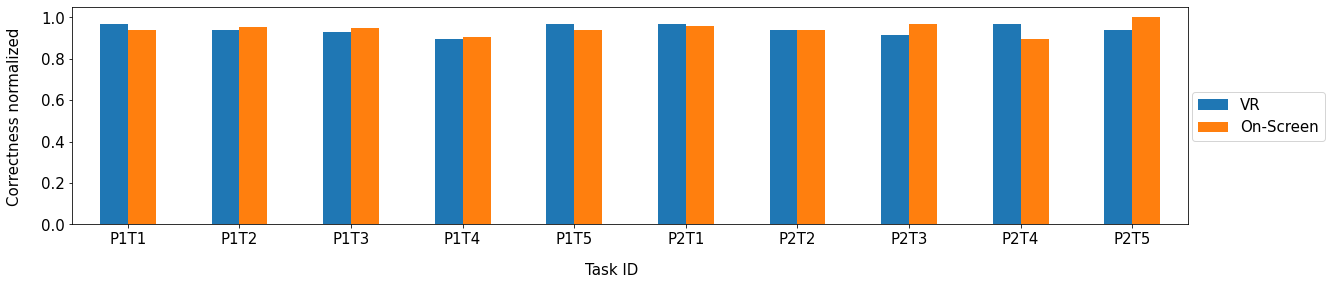

In [6]:
# VR vs On-Screen, each task
vr_vs_sc_eachtask = pd.DataFrame()


vr_first_part = (first_vr_chaoss[['P1T1', 'P1T2', 'P1T3', 'P1T4', 'P1T5']].mean() + first_vr_openshift[['P1T1', 'P1T2', 'P1T3', 'P1T4', 'P1T5']].mean())/2
vr_second_part = (first_sc_chaoss[['P2T1', 'P2T2', 'P2T3', 'P2T4', 'P2T5']].mean() + first_sc_openshift[['P2T1', 'P2T2', 'P2T3', 'P2T4', 'P2T5']].mean())/2
vr_series_all = vr_first_part.append(vr_second_part)
vr_df =pd.concat([vr_series_all],axis=1)
vr_df.columns = ['VR']
vr_df = vr_df.transpose()

sc_first_part = (first_sc_chaoss[['P1T1', 'P1T2', 'P1T3', 'P1T4', 'P1T5']].mean() + first_sc_openshift[['P1T1', 'P1T2', 'P1T3', 'P1T4', 'P1T5']].mean())/2
sc_second_part = (first_vr_chaoss[['P2T1', 'P2T2', 'P2T3', 'P2T4', 'P2T5']].mean() + first_vr_openshift[['P2T1', 'P2T2', 'P2T3', 'P2T4', 'P2T5']].mean())/2
sc_series_all = sc_first_part.append(sc_second_part)
sc_df =pd.concat([sc_series_all],axis=1)
sc_df.columns = ['On-Screen']
sc_df = sc_df.transpose()


vr_vs_sc_eachtask = pd.concat([vr_df, sc_df]).transpose()


fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 4))
c = vr_vs_sc_eachtask.plot(ax=axes, kind="bar", rot=0)
axes.get_legend().remove()
fig.legend([c],     # The line objects
           labels=["VR", "On-Screen"],   # The labels for each line
           loc="right",   # Position of legend
           #borderaxespad=-0.8,
            bbox_to_anchor=(1, 0.5)
           )

fig.text(0.5, -0.05, 'Task ID', ha='center')
fig.text(0.08, 0.5, 'Correctness normalized', va='center', rotation='vertical')

plt.savefig('correctness_eachtask_scvr_evolution.png', bbox_inches='tight')



vr_vs_sc_eachtask['diff'] = vr_vs_sc_eachtask['VR'].sub(vr_vs_sc_eachtask['On-Screen'], axis = 0)

print(vr_vs_sc_eachtask)

####################################################################################
# Mann Whitney Tests
### VR vs SC

from scipy.stats import mannwhitneyu

mannwhitney_vrsceach_df = pd.DataFrame(columns=["U", "p-value"])

# Part 1 Task 1
stat, p = mannwhitneyu(np.concatenate((first_vr_chaoss['P1T1'].values, first_vr_openshift['P1T1'].values), axis=None)
                       , np.concatenate((first_sc_chaoss['P1T1'].values, first_sc_openshift['P1T1'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P1T1"])
mannwhitney_vrsceach_df = pd.concat([mannwhitney_vrsceach_df, dn_row])

# Part 1 Task 2
stat, p = mannwhitneyu(np.concatenate((first_vr_chaoss['P1T2'].values, first_vr_openshift['P1T2'].values), axis=None)
                       , np.concatenate((first_sc_chaoss['P1T2'].values, first_sc_openshift['P1T2'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P1T2"])
mannwhitney_vrsceach_df = pd.concat([mannwhitney_vrsceach_df, dn_row])

# Part 1 Task 3
stat, p = mannwhitneyu(np.concatenate((first_vr_chaoss['P1T3'].values, first_vr_openshift['P1T3'].values), axis=None)
                       , np.concatenate((first_sc_chaoss['P1T3'].values, first_sc_openshift['P1T3'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P1T3"])
mannwhitney_vrsceach_df = pd.concat([mannwhitney_vrsceach_df, dn_row])

# Part 1 Task 4
stat, p = mannwhitneyu(np.concatenate((first_vr_chaoss['P1T4'].values, first_vr_openshift['P1T4'].values), axis=None)
                       , np.concatenate((first_sc_chaoss['P1T4'].values, first_sc_openshift['P1T4'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P1T4"])
mannwhitney_vrsceach_df = pd.concat([mannwhitney_vrsceach_df, dn_row])

# Part 1 Task 5
stat, p = mannwhitneyu(np.concatenate((first_vr_chaoss['P1T5'].values, first_vr_openshift['P1T5'].values), axis=None)
                       , np.concatenate((first_sc_chaoss['P1T5'].values, first_sc_openshift['P1T5'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P1T5"])
mannwhitney_vrsceach_df = pd.concat([mannwhitney_vrsceach_df, dn_row])

# Part 2 Task 1
stat, p = mannwhitneyu(np.concatenate((first_sc_chaoss['P2T1'].values, first_sc_openshift['P2T1'].values), axis=None)
                       , np.concatenate((first_vr_chaoss['P2T1'].values, first_vr_openshift['P2T1'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P2T1"])
mannwhitney_vrsceach_df = pd.concat([mannwhitney_vrsceach_df, dn_row])

# Part 2 Task 2
stat, p = mannwhitneyu(np.concatenate((first_sc_chaoss['P2T2'].values, first_sc_openshift['P2T2'].values), axis=None)
                       , np.concatenate((first_vr_chaoss['P2T2'].values, first_vr_openshift['P2T2'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P2T2"])
mannwhitney_vrsceach_df = pd.concat([mannwhitney_vrsceach_df, dn_row])

# Part 2 Task 3
stat, p = mannwhitneyu(np.concatenate((first_sc_chaoss['P2T3'].values, first_sc_openshift['P2T3'].values), axis=None)
                       , np.concatenate((first_vr_chaoss['P2T3'].values, first_vr_openshift['P2T3'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P2T3"])
mannwhitney_vrsceach_df = pd.concat([mannwhitney_vrsceach_df, dn_row])

# Part 2 Task 4
stat, p = mannwhitneyu(np.concatenate((first_sc_chaoss['P2T4'].values, first_sc_openshift['P2T4'].values), axis=None)
                       , np.concatenate((first_vr_chaoss['P2T4'].values, first_vr_openshift['P2T4'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P2T4"])
mannwhitney_vrsceach_df = pd.concat([mannwhitney_vrsceach_df, dn_row])

# Part 2 Task 5
stat, p = mannwhitneyu(np.concatenate((first_sc_chaoss['P2T5'].values, first_sc_openshift['P2T5'].values), axis=None)
                       , np.concatenate((first_vr_chaoss['P2T5'].values, first_vr_openshift['P2T5'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P2T5"])
mannwhitney_vrsceach_df = pd.concat([mannwhitney_vrsceach_df, dn_row])

# All
vr_times_concat = pd.concat([first_vr_openshift['P1T1'], first_vr_openshift['P1T2'], first_vr_openshift['P1T3'], 
                             first_vr_openshift['P1T4'], first_vr_openshift['P1T5'], first_vr_chaoss['P1T1'], 
                             first_vr_chaoss['P1T2'], first_vr_chaoss['P1T3'], first_vr_chaoss['P1T4'], 
                             first_vr_chaoss['P1T5'], first_sc_openshift['P2T1'], first_sc_openshift['P2T2'], first_sc_openshift['P2T3'], 
                             first_sc_openshift['P2T4'], first_sc_openshift['P2T5'], first_sc_chaoss['P2T1'], 
                             first_sc_chaoss['P2T2'], first_sc_chaoss['P2T3'], first_sc_chaoss['P2T4'], 
                             first_sc_chaoss['P2T5']])
sc_times_concat = pd.concat([first_sc_openshift['P1T1'], first_sc_openshift['P1T2'], first_sc_openshift['P1T3'], 
                             first_sc_openshift['P1T4'], first_sc_openshift['P1T5'], first_sc_chaoss['P1T1'], 
                             first_sc_chaoss['P1T2'], first_sc_chaoss['P1T3'], first_sc_chaoss['P1T4'], 
                             first_sc_chaoss['P1T5'], first_vr_openshift['P2T1'], first_vr_openshift['P2T2'], first_vr_openshift['P2T3'], 
                             first_vr_openshift['P2T4'], first_vr_openshift['P2T5'], first_vr_chaoss['P2T1'], 
                             first_vr_chaoss['P2T2'], first_vr_chaoss['P2T3'], first_vr_chaoss['P2T4'], 
                             first_vr_chaoss['P2T5']])
stat, p = mannwhitneyu(vr_times_concat.values, sc_times_concat.values, alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["All"])
mannwhitney_vrsceach_df = pd.concat([mannwhitney_vrsceach_df, dn_row])

# Cliff Effect Size
from __future__ import division

def cliffsDelta(lst1,lst2,
                dull = [0.147, # small
                        0.33,  # medium
                        0.474 # large
                        ][0] ): 
  "Returns true if there are more than 'dull' differences"
  m, n = len(lst1), len(lst2)
  lst2 = sorted(lst2)
  j = more = less = 0
  for repeats,x in runs(sorted(lst1)):
    while j <= (n - 1) and lst2[j] <  x: 
      j += 1
    more += j*repeats
    while j <= (n - 1) and lst2[j] == x: 
      j += 1
    less += (n - j)*repeats
  d= (more - less) / (m*n) 
  return abs(d), abs(d)  > dull
  
def runs(lst):
  "Iterator, chunks repeated values"
  for j,two in enumerate(lst):
    if j == 0:
      one,i = two,0
    if one!=two:
      yield j - i,one
      i = j
    one=two
  yield j - i + 1,two

### VR vs SC

cliff_df = pd.DataFrame(columns=["Cliff Eff Size"])

# Part 1 Task 1
stat, isdif = cliffsDelta(np.concatenate((first_vr_chaoss['P1T1'].values, first_vr_openshift['P1T1'].values), axis=None)
                       , np.concatenate((first_sc_chaoss['P1T1'].values, first_sc_openshift['P1T1'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P1T1"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 1 Task 2
stat, isdif = cliffsDelta(np.concatenate((first_vr_chaoss['P1T2'].values, first_vr_openshift['P1T2'].values), axis=None)
                       , np.concatenate((first_sc_chaoss['P1T2'].values, first_sc_openshift['P1T2'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P1T2"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 1 Task 3
stat, isdif = cliffsDelta(np.concatenate((first_vr_chaoss['P1T3'].values, first_vr_openshift['P1T3'].values), axis=None)
                       , np.concatenate((first_sc_chaoss['P1T3'].values, first_sc_openshift['P1T3'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P1T3"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 1 Task 4
stat, isdif = cliffsDelta(np.concatenate((first_vr_chaoss['P1T4'].values, first_vr_openshift['P1T4'].values), axis=None)
                       , np.concatenate((first_sc_chaoss['P1T4'].values, first_sc_openshift['P1T4'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P1T4"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 1 Task 5
stat, isdif = cliffsDelta(np.concatenate((first_vr_chaoss['P1T5'].values, first_vr_openshift['P1T5'].values), axis=None)
                       , np.concatenate((first_sc_chaoss['P1T5'].values, first_sc_openshift['P1T5'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P1T5"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 2 Task 1
stat, isdif = cliffsDelta(np.concatenate((first_sc_chaoss['P2T1'].values, first_sc_openshift['P2T1'].values), axis=None)
                       , np.concatenate((first_vr_chaoss['P2T1'].values, first_vr_openshift['P2T1'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P2T1"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 2 Task 2
stat, isdif = cliffsDelta(np.concatenate((first_sc_chaoss['P2T2'].values, first_sc_openshift['P2T2'].values), axis=None)
                       , np.concatenate((first_vr_chaoss['P2T2'].values, first_vr_openshift['P2T2'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P2T2"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 2 Task 3
stat, isdif = cliffsDelta(np.concatenate((first_sc_chaoss['P2T3'].values, first_sc_openshift['P2T3'].values), axis=None)
                       , np.concatenate((first_vr_chaoss['P2T3'].values, first_vr_openshift['P2T3'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P2T3"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 2 Task 4
stat, isdif = cliffsDelta(np.concatenate((first_sc_chaoss['P2T4'].values, first_sc_openshift['P2T4'].values), axis=None)
                       , np.concatenate((first_vr_chaoss['P2T4'].values, first_vr_openshift['P2T4'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P2T4"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 2 Task 5
stat, isdif = cliffsDelta(np.concatenate((first_sc_chaoss['P2T5'].values, first_sc_openshift['P2T5'].values), axis=None)
                       , np.concatenate((first_vr_chaoss['P2T5'].values, first_vr_openshift['P2T5'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P2T5"])
cliff_df = pd.concat([cliff_df, dn_row])

# All
stat, isdif = cliffsDelta(vr_times_concat.values, sc_times_concat.values)
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["All"])
cliff_df = pd.concat([cliff_df, dn_row])

# Show tablecliff_df
cliff_df

# Show table
mann_cliff = pd.concat([mannwhitney_vrsceach_df, cliff_df], axis=1)
print(mann_cliff)


# Show all table

results_mann_cliff = pd.concat([vr_vs_sc_eachtask, mann_cliff], axis=1)
print(results_mann_cliff.to_latex())

/tmp/ipykernel_56201/90684138.py:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  chaoss_series_all = chaoss_first_part.append(chaoss_second_part)
/tmp/ipykernel_56201/90684138.py:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  openshift_series_all = openshift_first_part.append(openshift_second_part)
/tmp/ipykernel_56201/90684138.py:25: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([c],     # The line objects


        CHAOSS  Openshift      diff
P1T1  0.968750   0.937500  0.031250
P1T2  0.968750   0.921875  0.046875
P1T3  0.906250   0.968125 -0.061875
P1T4  0.926875   0.875000  0.051875
P1T5  0.968750   0.937500  0.031250
P2T1  0.968750   0.958125  0.010625
P2T2  0.906250   0.968750 -0.062500
P2T3  0.937500   0.948125 -0.010625
P2T4  0.937500   0.926875  0.010625
P2T5  0.937500   1.000000 -0.062500
            U   p-value Cliff Eff Size
P1T1    136.0  0.575739         0.0625
P1T2    143.5  0.324723       0.121094
P1T3    123.5  0.824553       0.035156
P1T4    130.5  0.911703       0.019531
P1T5    136.0  0.575739         0.0625
P2T1    128.5       1.0       0.003906
P2T2    112.0  0.308048          0.125
P2T3    127.0  0.973813       0.007812
P2T4    129.0  0.973813       0.007812
P2T5    120.0  0.348501         0.0625
All   12863.0  0.891701       0.004922
\begin{tabular}{lrrrlll}
\toprule
{} &    CHAOSS &  Openshift &      diff &        U &   p-value & Cliff Eff Size \\
\midrule
P1T1 &  0.

/tmp/ipykernel_56201/90684138.py:210: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(results_mann_cliff.to_latex())


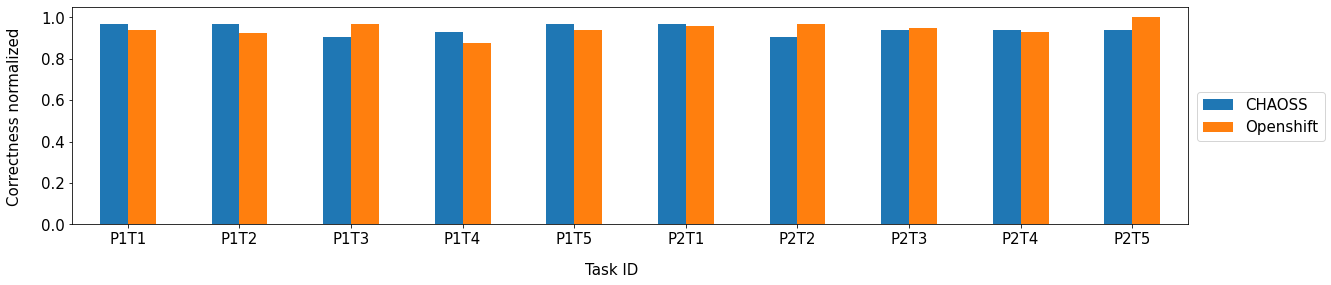

In [10]:
# Chaoss VS Openshift, each tasks
chaoss_vs_openshift_eachtask = pd.DataFrame()


chaoss_first_part = (first_vr_chaoss[['P1T1', 'P1T2', 'P1T3', 'P1T4', 'P1T5']].mean() + first_sc_chaoss[['P1T1', 'P1T2', 'P1T3', 'P1T4', 'P1T5']].mean())/2
chaoss_second_part = (first_vr_openshift[['P2T1', 'P2T2', 'P2T3', 'P2T4', 'P2T5']].mean() + first_sc_openshift[['P2T1', 'P2T2', 'P2T3', 'P2T4', 'P2T5']].mean())/2
chaoss_series_all = chaoss_first_part.append(chaoss_second_part)
chaoss_df =pd.concat([chaoss_series_all],axis=1)
chaoss_df.columns = ['CHAOSS']
chaoss_df = chaoss_df.transpose()

openshift_first_part = (first_vr_openshift[['P1T1', 'P1T2', 'P1T3', 'P1T4', 'P1T5']].mean() + first_sc_openshift[['P1T1', 'P1T2', 'P1T3', 'P1T4', 'P1T5']].mean())/2
openshift_second_part = (first_vr_chaoss[['P2T1', 'P2T2', 'P2T3', 'P2T4', 'P2T5']].mean() + first_sc_chaoss[['P2T1', 'P2T2', 'P2T3', 'P2T4', 'P2T5']].mean())/2
openshift_series_all = openshift_first_part.append(openshift_second_part)
openshift_df =pd.concat([openshift_series_all],axis=1)
openshift_df.columns = ['Openshift']
openshift_df = openshift_df.transpose()


chaoss_vs_openshift_eachtask = pd.concat([chaoss_df, openshift_df]).transpose()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 4))
c = chaoss_vs_openshift_eachtask.plot(ax=axes, kind="bar", rot=0)
axes.get_legend().remove()
fig.legend([c],     # The line objects
           labels=["CHAOSS", "Openshift"],   # The labels for each line
           loc="right",   # Position of legend
           #borderaxespad=-0.8,
            bbox_to_anchor=(1, 0.5)
           )

fig.text(0.5, -0.05, 'Task ID', ha='center')
fig.text(0.08, 0.5, 'Correctness normalized', va='center', rotation='vertical')

plt.savefig('correctness_eachtask_project_evolution.png', bbox_inches='tight')


chaoss_vs_openshift_eachtask['diff'] = chaoss_vs_openshift_eachtask['CHAOSS'].sub(chaoss_vs_openshift_eachtask['Openshift'], axis = 0)

print(chaoss_vs_openshift_eachtask)


####################################################################################
# Mann Whitney Tests
### VR vs SC

from scipy.stats import mannwhitneyu

mannwhitney_chaossopenshift_df = pd.DataFrame(columns=["U", "p-value"])

# Part 1 Task 1
stat, p = mannwhitneyu(np.concatenate((first_vr_chaoss['P1T1'].values, first_sc_chaoss['P1T1'].values), axis=None)
                       , np.concatenate((first_vr_openshift['P1T1'].values, first_sc_openshift['P1T1'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P1T1"])
mannwhitney_chaossopenshift_df = pd.concat([mannwhitney_chaossopenshift_df, dn_row])

# Part 1 Task 2
stat, p = mannwhitneyu(np.concatenate((first_vr_chaoss['P1T2'].values, first_sc_chaoss['P1T2'].values), axis=None)
                       , np.concatenate((first_vr_openshift['P1T2'].values, first_sc_openshift['P1T2'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P1T2"])
mannwhitney_chaossopenshift_df = pd.concat([mannwhitney_chaossopenshift_df, dn_row])

# Part 1 Task 3
stat, p = mannwhitneyu(np.concatenate((first_vr_chaoss['P1T3'].values, first_sc_chaoss['P1T3'].values), axis=None)
                       , np.concatenate((first_vr_openshift['P1T3'].values, first_sc_openshift['P1T3'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P1T3"])
mannwhitney_chaossopenshift_df = pd.concat([mannwhitney_chaossopenshift_df, dn_row])

# Part 1 Task 4
stat, p = mannwhitneyu(np.concatenate((first_vr_chaoss['P1T4'].values, first_sc_chaoss['P1T4'].values), axis=None)
                       , np.concatenate((first_vr_openshift['P1T4'].values, first_sc_openshift['P1T4'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P1T4"])
mannwhitney_chaossopenshift_df = pd.concat([mannwhitney_chaossopenshift_df, dn_row])

# Part 1 Task 5
stat, p = mannwhitneyu(np.concatenate((first_vr_chaoss['P1T5'].values, first_sc_chaoss['P1T5'].values), axis=None)
                       , np.concatenate((first_vr_openshift['P1T5'].values, first_sc_openshift['P1T5'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P1T5"])
mannwhitney_chaossopenshift_df = pd.concat([mannwhitney_chaossopenshift_df, dn_row])

# Part 2 Task 1
stat, p = mannwhitneyu(np.concatenate((first_vr_openshift['P2T1'].values, first_sc_openshift['P2T1'].values), axis=None)
                       , np.concatenate((first_vr_chaoss['P2T1'].values, first_sc_chaoss['P2T1'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P2T1"])
mannwhitney_chaossopenshift_df = pd.concat([mannwhitney_chaossopenshift_df, dn_row])

# Part 2 Task 2
stat, p = mannwhitneyu(np.concatenate((first_vr_openshift['P2T2'].values, first_sc_openshift['P2T2'].values), axis=None)
                       , np.concatenate((first_vr_chaoss['P2T2'].values, first_sc_chaoss['P2T2'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P2T2"])
mannwhitney_chaossopenshift_df = pd.concat([mannwhitney_chaossopenshift_df, dn_row])

# Part 2 Task 3
stat, p = mannwhitneyu(np.concatenate((first_vr_openshift['P2T3'].values, first_sc_openshift['P2T3'].values), axis=None)
                       , np.concatenate((first_vr_chaoss['P2T3'].values, first_sc_chaoss['P2T3'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P2T3"])
mannwhitney_chaossopenshift_df = pd.concat([mannwhitney_chaossopenshift_df, dn_row])

# Part 2 Task 4
stat, p = mannwhitneyu(np.concatenate((first_vr_openshift['P2T4'].values, first_sc_openshift['P2T4'].values), axis=None)
                       , np.concatenate((first_vr_chaoss['P2T4'].values, first_sc_chaoss['P2T4'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P2T4"])
mannwhitney_chaossopenshift_df = pd.concat([mannwhitney_chaossopenshift_df, dn_row])

# Part 2 Task 5
stat, p = mannwhitneyu(np.concatenate((first_vr_openshift['P2T5'].values, first_sc_openshift['P2T5'].values), axis=None)
                       , np.concatenate((first_vr_chaoss['P2T5'].values, first_sc_chaoss['P2T5'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P2T5"])
mannwhitney_chaossopenshift_df = pd.concat([mannwhitney_chaossopenshift_df, dn_row])

# All
chaoss_times_concat = pd.concat([first_sc_chaoss['P1T1'], first_sc_chaoss['P1T2'], first_sc_chaoss['P1T3'], 
                             first_sc_chaoss['P1T4'], first_sc_chaoss['P1T5'], first_vr_chaoss['P1T1'], 
                             first_vr_chaoss['P1T2'], first_vr_chaoss['P1T3'], first_vr_chaoss['P1T4'], 
                             first_vr_chaoss['P1T5'], first_sc_openshift['P2T1'], first_sc_openshift['P2T2'], first_sc_openshift['P2T3'], 
                             first_sc_openshift['P2T4'], first_sc_openshift['P2T5'], first_vr_openshift['P2T1'], 
                             first_vr_openshift['P2T2'], first_vr_openshift['P2T3'], first_vr_openshift['P2T4'], 
                             first_vr_openshift['P2T5']])
openshift_times_concat = pd.concat([first_sc_openshift['P1T1'], first_sc_openshift['P1T2'], first_sc_openshift['P1T3'], 
                             first_sc_openshift['P1T4'], first_sc_openshift['P1T5'], first_vr_openshift['P1T1'], 
                             first_vr_openshift['P1T2'], first_vr_openshift['P1T3'], first_vr_openshift['P1T4'], 
                             first_vr_openshift['P1T5'], first_sc_chaoss['P2T1'], first_sc_chaoss['P2T2'], first_sc_chaoss['P2T3'], 
                             first_sc_chaoss['P2T4'], first_sc_chaoss['P2T5'], first_vr_chaoss['P2T1'], 
                             first_vr_chaoss['P2T2'], first_vr_chaoss['P2T3'], first_vr_chaoss['P2T4'], 
                             first_vr_chaoss['P2T5']])
stat, p = mannwhitneyu(chaoss_times_concat.values, openshift_times_concat.values, alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["All"])
mannwhitney_chaossopenshift_df = pd.concat([mannwhitney_chaossopenshift_df, dn_row])

# Cliff Effect Size
### VR vs SC

cliff_df = pd.DataFrame(columns=["Cliff Eff Size"])

# Part 1 Task 1
stat, isdif = cliffsDelta(np.concatenate((first_vr_chaoss['P1T1'].values, first_sc_chaoss['P1T1'].values), axis=None)
                       , np.concatenate((first_vr_openshift['P1T1'].values, first_sc_openshift['P1T1'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P1T1"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 1 Task 2
stat, isdif = cliffsDelta(np.concatenate((first_vr_chaoss['P1T2'].values, first_sc_chaoss['P1T2'].values), axis=None)
                       , np.concatenate((first_vr_openshift['P1T2'].values, first_sc_openshift['P1T2'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P1T2"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 1 Task 3
stat, isdif = cliffsDelta(np.concatenate((first_vr_chaoss['P1T3'].values, first_sc_chaoss['P1T3'].values), axis=None)
                       , np.concatenate((first_vr_openshift['P1T3'].values, first_sc_openshift['P1T3'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P1T3"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 1 Task 4
stat, isdif = cliffsDelta(np.concatenate((first_vr_chaoss['P1T4'].values, first_sc_chaoss['P1T4'].values), axis=None)
                       , np.concatenate((first_vr_openshift['P1T4'].values, first_sc_openshift['P1T4'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P1T4"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 1 Task 5
stat, isdif = cliffsDelta(np.concatenate((first_vr_chaoss['P1T5'].values, first_sc_chaoss['P1T5'].values), axis=None)
                       , np.concatenate((first_vr_openshift['P1T5'].values, first_sc_openshift['P1T5'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P1T5"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 2 Task 1
stat, isdif = cliffsDelta(np.concatenate((first_vr_openshift['P2T1'].values, first_sc_openshift['P2T1'].values), axis=None)
                       , np.concatenate((first_vr_chaoss['P2T1'].values, first_sc_chaoss['P2T1'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P2T1"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 2 Task 2
stat, isdif = cliffsDelta(np.concatenate((first_vr_openshift['P2T2'].values, first_sc_openshift['P2T2'].values), axis=None)
                       , np.concatenate((first_vr_chaoss['P2T2'].values, first_sc_chaoss['P2T2'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P2T2"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 2 Task 3
stat, isdif = cliffsDelta(np.concatenate((first_vr_openshift['P2T3'].values, first_sc_openshift['P2T3'].values), axis=None)
                       , np.concatenate((first_vr_chaoss['P2T3'].values, first_sc_chaoss['P2T3'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P2T3"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 2 Task 4
stat, isdif = cliffsDelta(np.concatenate((first_vr_openshift['P2T4'].values, first_sc_openshift['P2T4'].values), axis=None)
                       , np.concatenate((first_vr_chaoss['P2T4'].values, first_sc_chaoss['P2T4'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P2T4"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 2 Task 5
stat, isdif = cliffsDelta(np.concatenate((first_vr_openshift['P2T5'].values, first_sc_openshift['P2T5'].values), axis=None)
                       , np.concatenate((first_vr_chaoss['P2T5'].values, first_sc_chaoss['P2T5'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P2T5"])
cliff_df = pd.concat([cliff_df, dn_row])

# All
stat, isdif = cliffsDelta(chaoss_times_concat.values, openshift_times_concat.values)
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["All"])
cliff_df = pd.concat([cliff_df, dn_row])

# Show table
cliff_df

# Show table
mann_cliff = pd.concat([mannwhitney_chaossopenshift_df, cliff_df], axis=1)
print(mann_cliff)

# Show all table

results_mann_cliff = pd.concat([chaoss_vs_openshift_eachtask, mann_cliff], axis=1)
print(results_mann_cliff.to_latex())

/tmp/ipykernel_56201/1260862577.py:28: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([c],     # The line objects


          VR  On-Screen      diff
T1  0.968750   0.953125  0.015625
T2  0.937500   0.945312 -0.007812
T3  0.921875   0.932187 -0.010312
T4  0.932187   0.937500 -0.005313
T5  0.953125   0.937500  0.015625
           U   p-value Cliff Eff Size
T1     529.0  0.633851       0.033203
T2     510.0  0.971982       0.003906
T3     477.0  0.463053       0.068359
T4     518.5  0.898398       0.012695
T5     511.0  0.987231       0.001953
All  12733.5  0.885677       0.005195
\begin{tabular}{lrrrlll}
\toprule
{} &        VR &  On-Screen &      diff &        U &   p-value & Cliff Eff Size \\
\midrule
T1  &  0.968750 &   0.953125 &  0.015625 &    529.0 &  0.633851 &       0.033203 \\
T2  &  0.937500 &   0.945312 & -0.007812 &    510.0 &  0.971982 &       0.003906 \\
T3  &  0.921875 &   0.932187 & -0.010312 &    477.0 &  0.463053 &       0.068359 \\
T4  &  0.932187 &   0.937500 & -0.005313 &    518.5 &  0.898398 &       0.012695 \\
T5  &  0.953125 &   0.937500 &  0.015625 &    511.0 &  0.987231 &   

/tmp/ipykernel_56201/1260862577.py:173: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(results_mann_cliff.to_latex())


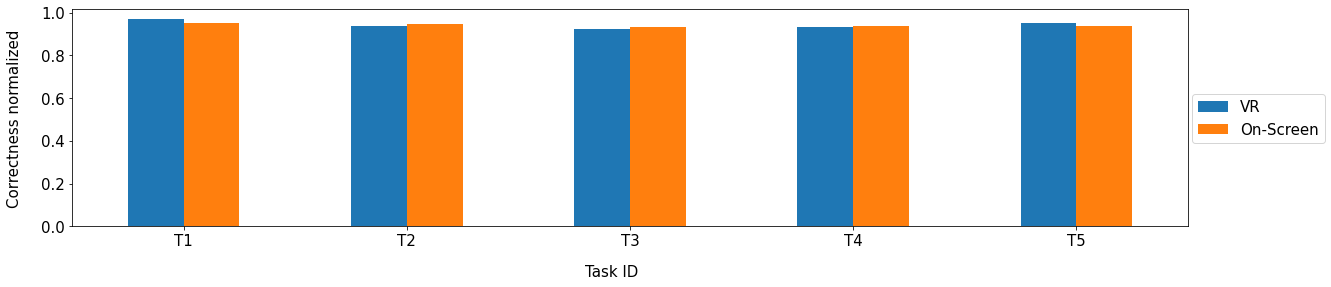

In [11]:
# VR vs On-Screen, all the tasks
vr_vs_sc_alltasks = pd.DataFrame()


vr_first_part = (first_vr_chaoss[['P1T1', 'P1T2', 'P1T3', 'P1T4', 'P1T5']].mean() + first_vr_openshift[['P1T1', 'P1T2', 'P1T3', 'P1T4', 'P1T5']].mean())/2
vr_first_part.index = ['T1', 'T2', 'T3', 'T4', 'T5']
vr_second_part = (first_sc_chaoss[['P2T1', 'P2T2', 'P2T3', 'P2T4', 'P2T5']].mean() + first_sc_openshift[['P2T1', 'P2T2', 'P2T3', 'P2T4', 'P2T5']].mean())/2
vr_second_part.index = ['T1', 'T2', 'T3', 'T4', 'T5']
vr_series_all = (vr_first_part + vr_second_part)/2
vr_df =pd.concat([vr_series_all],axis=1)
vr_df.columns = ['VR']
vr_df = vr_df.transpose()

sc_first_part = (first_sc_chaoss[['P1T1', 'P1T2', 'P1T3', 'P1T4', 'P1T5']].mean() + first_sc_openshift[['P1T1', 'P1T2', 'P1T3', 'P1T4', 'P1T5']].mean())/2
sc_first_part.index = ['T1', 'T2', 'T3', 'T4', 'T5']
sc_second_part = (first_sc_chaoss[['P2T1', 'P2T2', 'P2T3', 'P2T4', 'P2T5']].mean() + first_sc_openshift[['P2T1', 'P2T2', 'P2T3', 'P2T4', 'P2T5']].mean())/2
sc_second_part.index = ['T1', 'T2', 'T3', 'T4', 'T5']
sc_series_all = (sc_first_part + sc_second_part)/2
sc_df =pd.concat([sc_series_all],axis=1)
sc_df.columns = ['On-Screen']
sc_df = sc_df.transpose()

vr_vs_sc_alltasks = pd.concat([vr_df, sc_df]).transpose()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 4))
c = vr_vs_sc_alltasks.plot(ax=axes, kind="bar", rot=0)
axes.get_legend().remove()
fig.legend([c],     # The line objects
           labels=["VR", "On-Screen"],   # The labels for each line
           loc="right",   # Position of legend
           #borderaxespad=-0.8,
            bbox_to_anchor=(1, 0.5)
           )

fig.text(0.5, -0.05, 'Task ID', ha='center')
fig.text(0.08, 0.5, 'Correctness normalized', va='center', rotation='vertical')

plt.savefig('correctness_alltasks_scvr_evolution.png', bbox_inches='tight')


vr_vs_sc_alltasks['diff'] = vr_vs_sc_alltasks['VR'].sub(vr_vs_sc_alltasks['On-Screen'], axis = 0)

print(vr_vs_sc_alltasks)

####################################################################################
# Mann Whitney Tests
### VR vs SC

from scipy.stats import mannwhitneyu

mannwhitney_vrscall_df = pd.DataFrame(columns=["U", "p-value"])

# Task 1
stat, p = mannwhitneyu(np.concatenate((first_vr_chaoss['P1T1'].values, first_vr_openshift['P1T1'].values, 
                                       first_sc_chaoss['P2T1'].values, first_sc_openshift['P2T1'].values), axis=None), 
                       np.concatenate((first_sc_chaoss['P1T1'].values, first_sc_openshift['P1T1'].values,
                                       first_vr_chaoss['P2T1'].values, first_vr_openshift['P2T1'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["T1"])
mannwhitney_vrscall_df = pd.concat([mannwhitney_vrscall_df, dn_row])

# Task 2
stat, p = mannwhitneyu(np.concatenate((first_vr_chaoss['P1T2'].values, first_vr_openshift['P1T2'].values, 
                                       first_sc_chaoss['P2T2'].values, first_sc_openshift['P2T2'].values), axis=None), 
                       np.concatenate((first_sc_chaoss['P1T2'].values, first_sc_openshift['P1T2'].values,
                                       first_vr_chaoss['P2T2'].values, first_vr_openshift['P2T2'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["T2"])
mannwhitney_vrscall_df = pd.concat([mannwhitney_vrscall_df, dn_row])

# Task 3
stat, p = mannwhitneyu(np.concatenate((first_vr_chaoss['P1T3'].values, first_vr_openshift['P1T3'].values, 
                                       first_sc_chaoss['P2T3'].values, first_sc_openshift['P2T3'].values), axis=None), 
                       np.concatenate((first_sc_chaoss['P1T3'].values, first_sc_openshift['P1T3'].values,
                                       first_vr_chaoss['P2T3'].values, first_vr_openshift['P2T3'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["T3"])
mannwhitney_vrscall_df = pd.concat([mannwhitney_vrscall_df, dn_row])

# Task 4
stat, p = mannwhitneyu(np.concatenate((first_vr_chaoss['P1T4'].values, first_vr_openshift['P1T4'].values, 
                                       first_sc_chaoss['P2T4'].values, first_sc_openshift['P2T4'].values), axis=None), 
                       np.concatenate((first_sc_chaoss['P1T4'].values, first_sc_openshift['P1T4'].values,
                                       first_vr_chaoss['P2T4'].values, first_vr_openshift['P2T4'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["T4"])
mannwhitney_vrscall_df = pd.concat([mannwhitney_vrscall_df, dn_row])

# Task 5
stat, p = mannwhitneyu(np.concatenate((first_vr_chaoss['P1T5'].values, first_vr_openshift['P1T5'].values, 
                                       first_sc_chaoss['P2T5'].values, first_sc_openshift['P2T5'].values), axis=None), 
                       np.concatenate((first_sc_chaoss['P1T5'].values, first_sc_openshift['P1T5'].values,
                                       first_vr_chaoss['P2T5'].values, first_vr_openshift['P2T5'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["T5"])
mannwhitney_vrscall_df = pd.concat([mannwhitney_vrscall_df, dn_row])

# All
vr_times_concat = pd.concat([first_vr_openshift['P1T1'], first_vr_openshift['P1T2'], first_vr_openshift['P1T3'], 
                             first_vr_openshift['P1T4'], first_vr_openshift['P1T5'], first_vr_chaoss['P1T1'], 
                             first_vr_chaoss['P1T2'], first_vr_chaoss['P1T3'], first_vr_chaoss['P1T4'], 
                             first_vr_chaoss['P1T5'], first_sc_openshift['P2T1'], first_sc_openshift['P2T2'], first_sc_openshift['P2T3'], 
                             first_sc_openshift['P2T4'], first_sc_openshift['P2T5'], first_sc_chaoss['P2T1'], 
                             first_sc_chaoss['P2T2'], first_sc_chaoss['P2T3'], first_sc_chaoss['P2T4'], 
                             first_sc_chaoss['P2T5']])
sc_times_concat = pd.concat([first_sc_openshift['P1T1'], first_sc_openshift['P1T2'], first_sc_openshift['P1T3'], 
                             first_sc_openshift['P1T4'], first_sc_openshift['P1T5'], first_sc_chaoss['P1T1'], 
                             first_sc_chaoss['P1T2'], first_sc_chaoss['P1T3'], first_sc_chaoss['P1T4'], 
                             first_sc_chaoss['P1T5'], first_vr_openshift['P2T1'], first_vr_openshift['P2T2'], first_vr_openshift['P2T3'], 
                             first_vr_openshift['P2T4'], first_vr_openshift['P2T5'], first_vr_chaoss['P2T1'], 
                             first_vr_chaoss['P2T2'], first_vr_chaoss['P2T3'], first_vr_chaoss['P2T4'], 
                             first_vr_chaoss['P2T5']])
stat, p = mannwhitneyu(vr_times_concat.values, sc_times_concat.values, alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["All"])
mannwhitney_vrscall_df = pd.concat([mannwhitney_vrscall_df, dn_row])

# Cliff Effect Size
### VR vs SC

cliff_df = pd.DataFrame(columns=["Cliff Eff Size"])

# Task 1
stat, isdif = cliffsDelta(np.concatenate((first_vr_chaoss['P1T1'].values, first_vr_openshift['P1T1'].values, 
                                       first_sc_chaoss['P2T1'].values, first_sc_openshift['P2T1'].values), axis=None), 
                       np.concatenate((first_sc_chaoss['P1T1'].values, first_sc_openshift['P1T1'].values,
                                       first_vr_chaoss['P2T1'].values, first_vr_openshift['P2T1'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["T1"])
cliff_df = pd.concat([cliff_df, dn_row])

# Task 2
stat, isdif = cliffsDelta(np.concatenate((first_vr_chaoss['P1T2'].values, first_vr_openshift['P1T2'].values, 
                                       first_sc_chaoss['P2T2'].values, first_sc_openshift['P2T2'].values), axis=None), 
                       np.concatenate((first_sc_chaoss['P1T2'].values, first_sc_openshift['P1T2'].values,
                                       first_vr_chaoss['P2T2'].values, first_vr_openshift['P2T2'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["T2"])
cliff_df = pd.concat([cliff_df, dn_row])

# Task 3
stat, isdif = cliffsDelta(np.concatenate((first_vr_chaoss['P1T3'].values, first_vr_openshift['P1T3'].values, 
                                       first_sc_chaoss['P2T3'].values, first_sc_openshift['P2T3'].values), axis=None), 
                       np.concatenate((first_sc_chaoss['P1T3'].values, first_sc_openshift['P1T3'].values,
                                       first_vr_chaoss['P2T3'].values, first_vr_openshift['P2T3'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["T3"])
cliff_df = pd.concat([cliff_df, dn_row])

# Task 4
stat, isdif = cliffsDelta(np.concatenate((first_vr_chaoss['P1T4'].values, first_vr_openshift['P1T4'].values, 
                                       first_sc_chaoss['P2T4'].values, first_sc_openshift['P2T4'].values), axis=None), 
                       np.concatenate((first_sc_chaoss['P1T4'].values, first_sc_openshift['P1T4'].values,
                                       first_vr_chaoss['P2T4'].values, first_vr_openshift['P2T4'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["T4"])
cliff_df = pd.concat([cliff_df, dn_row])

# Task 5
stat, isdif = cliffsDelta(np.concatenate((first_vr_chaoss['P1T5'].values, first_vr_openshift['P1T5'].values, 
                                       first_sc_chaoss['P2T5'].values, first_sc_openshift['P2T5'].values), axis=None), 
                       np.concatenate((first_sc_chaoss['P1T5'].values, first_sc_openshift['P1T5'].values,
                                       first_vr_chaoss['P2T5'].values, first_vr_openshift['P2T5'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["T5"])
cliff_df = pd.concat([cliff_df, dn_row])

# All
stat, isdif = cliffsDelta(vr_times_concat.values, sc_times_concat.values)
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["All"])
cliff_df = pd.concat([cliff_df, dn_row])

# Show table
cliff_df

# Show table
mann_cliff = pd.concat([mannwhitney_vrscall_df, cliff_df], axis=1)
print(mann_cliff)


# Show all table

results_mann_cliff = pd.concat([vr_vs_sc_alltasks, mann_cliff], axis=1)
print(results_mann_cliff.to_latex())

/tmp/ipykernel_56201/2116971716.py:28: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([c],     # The line objects


      CHAOSS  Openshift      diff
T1  0.968750   0.947812  0.020938
T2  0.937500   0.945312 -0.007812
T3  0.921875   0.958125 -0.036250
T4  0.932187   0.900937  0.031250
T5  0.953125   0.968750 -0.015625
           U   p-value Cliff Eff Size
T1     529.0  0.633851       0.033203
T2     510.0  0.971982       0.003906
T3     502.0  0.839863       0.019531
T4     518.5  0.898398       0.012695
T5     511.0  0.987231       0.001953
All  12863.0  0.891701       0.005195
\begin{tabular}{lrrrlll}
\toprule
{} &    CHAOSS &  Openshift &      diff &        U &   p-value & Cliff Eff Size \\
\midrule
T1  &  0.968750 &   0.947812 &  0.020938 &    529.0 &  0.633851 &       0.033203 \\
T2  &  0.937500 &   0.945312 & -0.007812 &    510.0 &  0.971982 &       0.003906 \\
T3  &  0.921875 &   0.958125 & -0.036250 &    502.0 &  0.839863 &       0.019531 \\
T4  &  0.932187 &   0.900937 &  0.031250 &    518.5 &  0.898398 &       0.012695 \\
T5  &  0.953125 &   0.968750 & -0.015625 &    511.0 &  0.987231 &   

/tmp/ipykernel_56201/2116971716.py:171: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(results_mann_cliff.to_latex())


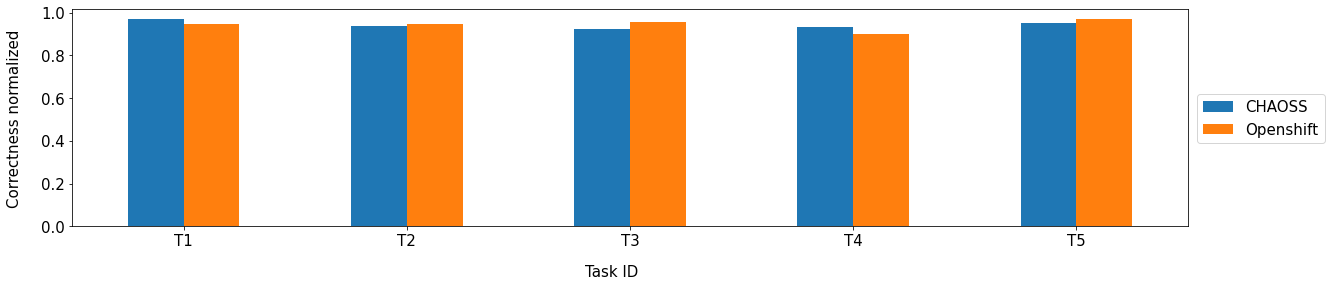

In [12]:
# CHAOSS vs OpenShift, all the tasks
chaoss_vs_openshift_alltasks = pd.DataFrame()


chaoss_first_part = (first_vr_chaoss[['P1T1', 'P1T2', 'P1T3', 'P1T4', 'P1T5']].mean() + first_sc_chaoss[['P1T1', 'P1T2', 'P1T3', 'P1T4', 'P1T5']].mean())/2
chaoss_first_part.index = ['T1', 'T2', 'T3', 'T4', 'T5']
chaoss_second_part = (first_vr_openshift[['P2T1', 'P2T2', 'P2T3', 'P2T4', 'P2T5']].mean() + first_sc_openshift[['P2T1', 'P2T2', 'P2T3', 'P2T4', 'P2T5']].mean())/2
chaoss_second_part.index = ['T1', 'T2', 'T3', 'T4', 'T5']
chaoss_series_all = (chaoss_first_part + chaoss_second_part)/2
chaoss_df =pd.concat([chaoss_series_all],axis=1)
chaoss_df.columns = ['CHAOSS']
chaoss_df = chaoss_df.transpose()

openshift_first_part = (first_vr_openshift[['P1T1', 'P1T2', 'P1T3', 'P1T4', 'P1T5']].mean() + first_sc_openshift[['P1T1', 'P1T2', 'P1T3', 'P1T4', 'P1T5']].mean())/2
openshift_first_part.index = ['T1', 'T2', 'T3', 'T4', 'T5']
openshift_second_part = (first_vr_chaoss[['P2T1', 'P2T2', 'P2T3', 'P2T4', 'P2T5']].mean() + first_sc_chaoss[['P2T1', 'P2T2', 'P2T3', 'P2T4', 'P2T5']].mean())/2
openshift_second_part.index = ['T1', 'T2', 'T3', 'T4', 'T5']
openshift_series_all = (openshift_first_part + openshift_second_part)/2
openshift_df =pd.concat([openshift_series_all],axis=1)
openshift_df.columns = ['Openshift']
openshift_df = openshift_df.transpose()

chaoss_vs_openshift_alltasks = pd.concat([chaoss_df, openshift_df]).transpose()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 4))
c = chaoss_vs_openshift_alltasks.plot(ax=axes, kind="bar", rot=0)
axes.get_legend().remove()
fig.legend([c],     # The line objects
           labels=["CHAOSS", "Openshift"],   # The labels for each line
           loc="right",   # Position of legend
           #borderaxespad=-0.8,
            bbox_to_anchor=(1, 0.5)
           )

fig.text(0.5, -0.05, 'Task ID', ha='center')
fig.text(0.08, 0.5, 'Correctness normalized', va='center', rotation='vertical')

plt.savefig('correctness_alltasks_project_evolution.png', bbox_inches='tight')

chaoss_vs_openshift_alltasks['diff'] = chaoss_vs_openshift_alltasks['CHAOSS'].sub(chaoss_vs_openshift_alltasks['Openshift'], axis = 0)

print(chaoss_vs_openshift_alltasks)

####################################################################################
# Mann Whitney Tests
### VR vs SC

from scipy.stats import mannwhitneyu

mannwhitney_chaossopenshiftall_df = pd.DataFrame(columns=["U", "p-value"])

# Task 1
stat, p = mannwhitneyu(np.concatenate((first_vr_chaoss['P1T1'].values, first_sc_chaoss['P1T1'].values, 
                                 first_vr_openshift['P2T1'].values, first_sc_openshift['P2T1'].values), axis=None), 
                 np.concatenate((first_vr_openshift['P1T1'].values, first_sc_openshift['P1T1'].values,
                                       first_vr_chaoss['P2T1'].values, first_sc_chaoss['P2T1'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["T1"])
mannwhitney_chaossopenshiftall_df = pd.concat([mannwhitney_chaossopenshiftall_df, dn_row])

# Task 2
stat, p = mannwhitneyu(np.concatenate((first_vr_chaoss['P1T2'].values, first_sc_chaoss['P1T2'].values, 
                                 first_vr_openshift['P2T2'].values, first_sc_openshift['P2T2'].values), axis=None), 
                 np.concatenate((first_vr_openshift['P1T2'].values, first_sc_openshift['P1T2'].values,
                                       first_vr_chaoss['P2T2'].values, first_sc_chaoss['P2T2'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["T2"])
mannwhitney_chaossopenshiftall_df = pd.concat([mannwhitney_chaossopenshiftall_df, dn_row])

# Task 3
stat, p = mannwhitneyu(np.concatenate((first_vr_chaoss['P1T3'].values, first_sc_chaoss['P1T3'].values, 
                                 first_vr_openshift['P2T3'].values, first_sc_openshift['P2T3'].values), axis=None), 
                 np.concatenate((first_vr_openshift['P1T3'].values, first_sc_openshift['P1T3'].values,
                                       first_vr_chaoss['P2T3'].values, first_sc_chaoss['P2T3'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["T3"])
mannwhitney_chaossopenshiftall_df = pd.concat([mannwhitney_chaossopenshiftall_df, dn_row])

# Task 4
stat, p = mannwhitneyu(np.concatenate((first_vr_chaoss['P1T4'].values, first_sc_chaoss['P1T4'].values, 
                                 first_vr_openshift['P2T4'].values, first_sc_openshift['P2T4'].values), axis=None), 
                 np.concatenate((first_vr_openshift['P1T4'].values, first_sc_openshift['P1T4'].values,
                                       first_vr_chaoss['P2T4'].values, first_sc_chaoss['P2T4'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["T4"])
mannwhitney_chaossopenshiftall_df = pd.concat([mannwhitney_chaossopenshiftall_df, dn_row])

# Task 5
stat, p = mannwhitneyu(np.concatenate((first_vr_chaoss['P1T5'].values, first_sc_chaoss['P1T5'].values, 
                                 first_vr_openshift['P2T5'].values, first_sc_openshift['P2T5'].values), axis=None), 
                 np.concatenate((first_vr_openshift['P1T5'].values, first_sc_openshift['P1T5'].values,
                                       first_vr_chaoss['P2T5'].values, first_sc_chaoss['P2T5'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["T5"])
mannwhitney_chaossopenshiftall_df = pd.concat([mannwhitney_chaossopenshiftall_df, dn_row])

# All
chaoss_times_concat = pd.concat([first_sc_chaoss['P1T1'], first_sc_chaoss['P1T2'], first_sc_chaoss['P1T3'], 
                             first_sc_chaoss['P1T4'], first_sc_chaoss['P1T5'], first_vr_chaoss['P1T1'], 
                             first_vr_chaoss['P1T2'], first_vr_chaoss['P1T3'], first_vr_chaoss['P1T4'], 
                             first_vr_chaoss['P1T5'], first_sc_openshift['P2T1'], first_sc_openshift['P2T2'], first_sc_openshift['P2T3'], 
                             first_sc_openshift['P2T4'], first_sc_openshift['P2T5'], first_vr_openshift['P2T1'], 
                             first_vr_openshift['P2T2'], first_vr_openshift['P2T3'], first_vr_openshift['P2T4'], 
                             first_vr_openshift['P2T5']])
openshift_times_concat = pd.concat([first_sc_openshift['P1T1'], first_sc_openshift['P1T2'], first_sc_openshift['P1T3'], 
                             first_sc_openshift['P1T4'], first_sc_openshift['P1T5'], first_vr_openshift['P1T1'], 
                             first_vr_openshift['P1T2'], first_vr_openshift['P1T3'], first_vr_openshift['P1T4'], 
                             first_vr_openshift['P1T5'], first_sc_chaoss['P2T1'], first_sc_chaoss['P2T2'], first_sc_chaoss['P2T3'], 
                             first_sc_chaoss['P2T4'], first_sc_chaoss['P2T5'], first_vr_chaoss['P2T1'], 
                             first_vr_chaoss['P2T2'], first_vr_chaoss['P2T3'], first_vr_chaoss['P2T4'], 
                             first_vr_chaoss['P2T5']])
stat, p = mannwhitneyu(chaoss_times_concat.values, openshift_times_concat.values, alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["All"])
mannwhitney_chaossopenshiftall_df = pd.concat([mannwhitney_chaossopenshiftall_df, dn_row])

# Cliff Effect Size
### VR vs SC

cliff_df = pd.DataFrame(columns=["Cliff Eff Size"])

# Task 1
stat, isdif = cliffsDelta(np.concatenate((first_vr_chaoss['P1T1'].values, first_sc_chaoss['P1T1'].values, 
                                       first_vr_openshift['P2T1'].values, first_sc_openshift['P2T1'].values), axis=None), 
                       np.concatenate((first_vr_openshift['P1T1'].values, first_sc_openshift['P1T1'].values,
                                       first_vr_chaoss['P2T1'].values, first_sc_chaoss['P2T1'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["T1"])
cliff_df = pd.concat([cliff_df, dn_row])

# Task 2
stat, isdif = cliffsDelta(np.concatenate((first_vr_chaoss['P1T2'].values, first_sc_chaoss['P1T2'].values, 
                                       first_vr_openshift['P2T2'].values, first_sc_openshift['P2T2'].values), axis=None), 
                       np.concatenate((first_vr_openshift['P1T2'].values, first_sc_openshift['P1T2'].values,
                                       first_vr_chaoss['P2T2'].values, first_sc_chaoss['P2T2'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["T2"])
cliff_df = pd.concat([cliff_df, dn_row])

# Task 3
stat, isdif = cliffsDelta(np.concatenate((first_vr_chaoss['P1T3'].values, first_sc_chaoss['P1T3'].values, 
                                       first_vr_openshift['P2T3'].values, first_sc_openshift['P2T3'].values), axis=None), 
                       np.concatenate((first_vr_openshift['P1T3'].values, first_sc_openshift['P1T3'].values,
                                       first_vr_chaoss['P2T3'].values, first_sc_chaoss['P2T3'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["T3"])
cliff_df = pd.concat([cliff_df, dn_row])

# Task 4
stat, isdif = cliffsDelta(np.concatenate((first_vr_chaoss['P1T4'].values, first_sc_chaoss['P1T4'].values, 
                                       first_vr_openshift['P2T4'].values, first_sc_openshift['P2T4'].values), axis=None), 
                       np.concatenate((first_vr_openshift['P1T4'].values, first_sc_openshift['P1T4'].values,
                                       first_vr_chaoss['P2T4'].values, first_sc_chaoss['P2T4'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["T4"])
cliff_df = pd.concat([cliff_df, dn_row])

# Task 5
stat, isdif = cliffsDelta(np.concatenate((first_vr_chaoss['P1T5'].values, first_sc_chaoss['P1T5'].values, 
                                       first_vr_openshift['P2T5'].values, first_sc_openshift['P2T5'].values), axis=None), 
                       np.concatenate((first_vr_openshift['P1T5'].values, first_sc_openshift['P1T5'].values,
                                       first_vr_chaoss['P2T5'].values, first_sc_chaoss['P2T5'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["T5"])
cliff_df = pd.concat([cliff_df, dn_row])

# All
stat, isdif = cliffsDelta(vr_times_concat.values, sc_times_concat.values)
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["All"])
cliff_df = pd.concat([cliff_df, dn_row])

# Show table
cliff_df

# Show table
mann_cliff = pd.concat([mannwhitney_chaossopenshiftall_df, cliff_df], axis=1)
print(mann_cliff)

# Show all table

results_mann_cliff = pd.concat([chaoss_vs_openshift_alltasks, mann_cliff], axis=1)
print(results_mann_cliff.to_latex())